In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [4]:
#Obtener equipos y los ids con los que están registrados en la página de FIFA
url_equipos="https://api.fifa.com/api/v3/competitions/teams/285026?language=es"

In [16]:
#btener JSON de la página
r_equipos=requests.get(url_equipos)
equipos=r_equipos.json()

In [30]:
#Ids y selecciones
ids=[]
selecciones=[]

for i in range (0,32):
    ids.append(equipos["Results"][i]["IdTeam"])
    selecciones.append(equipos["Results"][i]["ShortClubName"])


In [33]:
#Poner en un dataframe
df=pd.DataFrame({"id":ids,"seleccion":selecciones})
df

,id,seleccion
0,1884881,Argentina
1,1882891,Australia
2,1882881,Brazil
3,1883718,Canada
4,1882892,China PR
5,1885035,Colombia
6,1884880,Costa Rica
7,1883719,Denmark
8,1883720,England
9,1884761,France


### Obtener datos de las jugadoras

In [80]:
#Parámetros básicos para la url
url_basica="https://api.fifa.com/api/v3/teams/"
fin="/squad?idCompetition=103&idSeason=285026&language=es"

In [99]:
# Construir la url para cada equipo
data=[]
for ids in df["id"]:
    url = url_basica + str(ids) + fin
    r = requests.get(url)
    if r.status_code == 200:  # Checar que la respuesta sea exitosa
        data.append(r.json())
    else:
        print(f"Falló la respuesta del {ids} Código {r.status_code}")

# Obtener datos de las jugadoras
nombres=[]
seleccion=[]
posicion=[]
altura=[]
for team_data in data:
    for i in range(0,len(team_data["Players"])):
        nombres.append(team_data["Players"][i]["PlayerName"][0]["Description"])
        seleccion.append(team_data["TeamName"][0]["Description"])
        posicion.append(team_data["Players"][i]["Position"])
        altura.append(team_data["Players"][i]["Height"])


In [100]:
#Dataframe
jugadoras=pd.DataFrame({"nombre":nombres,"seleccion":seleccion,"posicion":posicion,"altura":altura})
jugadoras

,nombre,seleccion,posicion,altura
0,Vanina CORREA,Argentina,0,180.0
1,Adriana María Sachs,Argentina,1,163.0
2,Eliana STABILE,Argentina,1,167.0
3,Julieta CRUZ,Argentina,1,160.0
4,Vanesa Santana,Argentina,2,157.0
...,...,...,...,...
731,Siomala Mapepa,Zambia,3,163.0
732,Hellen CHANDA,Zambia,3,165.0
733,Avell CHITUNDU,Zambia,2,140.0
734,Esther BANDA,Zambia,1,156.0


In [101]:
#Filtrar si es argentina
jugadoras_arg=jugadoras[jugadoras["seleccion"]=="Argentina"]
jugadoras_arg.head(30)

,nombre,seleccion,posicion,altura
0,Vanina CORREA,Argentina,0,180.0
1,Adriana María Sachs,Argentina,1,163.0
2,Eliana STABILE,Argentina,1,167.0
3,Julieta CRUZ,Argentina,1,160.0
4,Vanesa Santana,Argentina,2,157.0
5,Aldana Cometti,Argentina,1,168.0
6,Romina NUNEZ,Argentina,2,158.0
7,Daiana FALFAN,Argentina,2,165.0
8,Paulina GRAMAGLIA,Argentina,3,175.0
9,Dalila IPPOLITO,Argentina,2,157.0


### Porteras del torneo

In [102]:
#Filtrar por posición si es cero
porteras=jugadoras[jugadoras["posicion"]==0]
porteras

,nombre,seleccion,posicion,altura
0,Vanina CORREA,Argentina,0,180.0
11,Lara ESPONDA,Argentina,0,170.0
22,Abigail CHAVES,Argentina,0,175.0
23,Lydia WILLIAMS,Australia,0,175.0
34,Teagan MICAH,Australia,0,174.0
...,...,...,...,...
703,Thi Kim Thanh TRAN,Vietnam,0,165.0
709,Thi Hang KHONG,Vietnam,0,169.0
713,Catherine MUSONDA,Zambia,0,170.0
728,Leticia LUNGU,Zambia,0,156.0


In [103]:
#Obtener promedio de altura
porteras["altura"].mean()

173.84375

(array([ 1.,  1.,  3., 11., 22., 32.,  9., 13.,  3.,  1.]),
 array([156. , 159.4, 162.8, 166.2, 169.6, 173. , 176.4, 179.8, 183.2,
        186.6, 190. ]),
 <BarContainer object of 10 artists>)

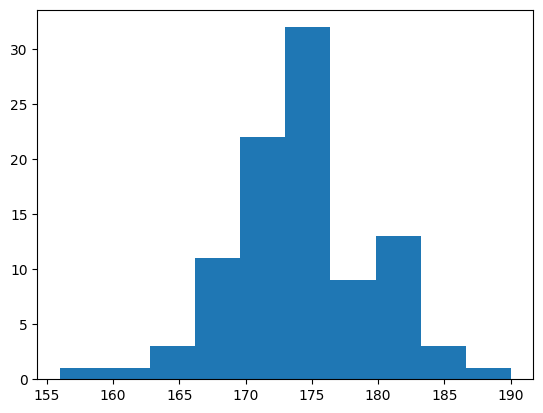

In [104]:
#Histograma de alturas
plt.hist(porteras["altura"],bins=10)